In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='deep')


In [3]:
file_path = "/Users/moaya/OneDrive/Desktop/mbd-corporateproject-EY-main/Data/Processed/outputcheckcombined2.xlsx"
df = pd.read_excel(file_path)
df.head()


company_name                                      legal_name priority  \
0       Abbott  ABBOTT LABORATORIES, S.A. - DIVISIÓN NUTRICIÓN   Tier 4   
1       Ordesa                          Laboratorios Ordesa SL   Tier 2   
2    Herbalife               Herbalife International España SA   Tier 4   
3    Delafruit                                 DELAFRUIT, S.L.   Tier 4   
4      Liquats                             Liquats Vegetals SA   Tier 4   

      tax_id               owner ownership_type  transaction_year  \
0  A08099681  ABOTT LABORATORIES     Subsidiary               NaN   
1  B60402682      EUROPE FOOD SA     Subsidiary               NaN   
2  A78908621      HERBALIFE LTD.     Subsidiary               NaN   
3  B61690848              ANDROS     Subsidiary            2025.0   
4  A17309329  ERRA MARTIN FAMILY   Family owner               NaN   

   transaction_period is_tradeable holding_nationality    region   province  \
0                 NaN            N                  US    Madrid     Madrid   
1                 NaN            Y               Spain  Cataluña  Barcelona   
2                 NaN            N                  US    Madrid     Madrid   
3                 0.0            N              France  Cataluña  Tarragona   
4                 NaN            Y               Spain  Cataluña     Girona   

                city                          website      lya  cu  \
0             MADRID           https://www.es.abbott/  45291.0  U1   
1          BARCELONA       https://www.ordesalab.com/  45291.0  U1   
2             MADRID  https://www.herbalife.com/es-es  45291.0  U1   
3  LA SELVA DEL CAMP       https://www.delafruit.com/  45291.0  U2   
4           VILADRAU             https://liquats.com/  45291.0  U2   

  revenue_lya revenue_lya__1 revenue_lya__2 cagr_last_3_yrs  ebitda_lya  \
0      1408.7       1502.589        1069.66        0.147589  163.572000   
1      140.69        137.243        123.802        0.066026    6.289000   
2  129.672742     147.171889     156.194094       -0.088845    3.947810   
3     129.334         93.788        111.148        0.078712   11.656000   
4   91.274639      85.772862      85.927044        0.030647   10.924946   

  ebitda_lya__1 ebitda_lya__2 ebitda_margin_lya ebitda_margin_lya__1  \
0        99.557       111.414          0.116116             0.066257   
1        -8.639         3.392          0.044701            -0.062947   
2       4.52828      3.479959          0.030444             0.030769   
3         5.834         8.431          0.090123             0.062204   
4      9.116998     11.580195          0.119693             0.106292   

  ebitda_margin_lya__2 1º_characterization 2º_characterization  \
0             0.104158                 CPR                FMCG   
1             0.027399                 CPR                FMCG   
2              0.02228                 CPR                FMCG   
3             0.075854                 CPR                FMCG   
4             0.134768                 CPR                FMCG   

       3º_characterization                      4º_characterization  \
0  Food - Food supplements   Nutrición médica y fórmulas infantiles   
1  Food - Food supplements   Nutrición médica y fórmulas infantiles   
2  Food - Food supplements  Complementos alimenticios y fitoterapia   
3  Food - Food supplements                    Alimentos funcionales   
4  Food - Food supplements                    Alimentos funcionales   

  5º_characterization  6º_characterization comments  revenue_lya_m  \
0                 NaN                  NaN      NaN            NaN   
1                 NaN                  NaN      NaN            NaN   
2                 NaN                  NaN      NaN            NaN   
3                 NaN                  NaN      NaN            NaN   
4                 NaN                  NaN      NaN            NaN   

   ebitda_lya_m  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [ ]:
df.columns = [
    "company_name", "legal_name", "priority", "tax_id", "owner", "ownership_type",
    "transaction_year", "transaction_period", "is_tradeable", "holding_nationality",
    "region", "province", "city", "website", "lya", "cu",
    "revenue_lya", "revenue_lya_1", "revenue_lya_2", "cagr_last_3yrs",
    "ebitda_lya", "ebitda_lya_1", "ebitda_lya_2",
    "ebitda_margin_lya", "ebitda_margin_lya_1", "ebitda_margin_lya_2",
    "char_1", "char_2", "char_3", "char_4", "char_5", "char_6",
    "comments", "revenue_lya_m", "ebitda_lya_m"
]

In [5]:
print("Shape:", df.shape)
df.info()
df.sample(5)


Shape: (1889, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_name         1883 non-null   object 
 1   legal_name           1888 non-null   object 
 2   priority             1888 non-null   object 
 3   tax_id               1888 non-null   object 
 4   owner                1851 non-null   object 
 5   ownership_type       1860 non-null   object 
 6   transaction_year     116 non-null    float64
 7   transaction_period   115 non-null    float64
 8   is_tradeable         1865 non-null   object 
 9   holding_nationality  1865 non-null   object 
 10  region               1888 non-null   object 
 11  province             1886 non-null   object 
 12  city                 1758 non-null   object 
 13  website              1811 non-null   object 
 14  lya                  1866 non-null   float64
 15  cu                  

company_name                                  legal_name priority  \
364     Juan Martinez SL                            JUAN MARTINEZ SL   Tier 3   
501            MARTONELA                 INHELAR, SOCIEDAD LIMITADA.   Tier 4   
512              AN GRUP  ARTEMI NOLLA GRUP GESTIO DE RESTAURANTS SL   Tier 4   
117              Agralia                    AGRALIA FERTILIZANTES SL   Tier 4   
87   Fitoplancton Marino                      FITOPLANCTON MARINO SL   Tier 4   

        tax_id                             owner ownership_type  \
364  B33005877   MRS GUILLERMINA CAMINO GONZALEZ  Private Owner   
501  B73979684    Francisco Javier Martinez Rico  Private Owner   
512  B62840673             Artemio Nolla Furriol  Private Owner   
117  B22279087        TRIFUCHSIA HOLDCO S.À R.L.     Subsidiary   
87   B11543667  INSTITUTO HISPANICO DEL ARROZ SA     Subsidiary   

     transaction_year  transaction_period is_tradeable holding_nationality  \
364               NaN                 NaN            Y               Spain   
501               NaN                 NaN            Y               Spain   
512               NaN                 NaN            Y               Spain   
117               NaN                 NaN            N          Luxembourg   
87                NaN                 NaN            Y               Spain   

        region   province                      city  \
364   Asturias   Asturias                     SIERO   
501     Murcia     Murcia                    MURCIA   
512   Cataluña  Barcelona                 BARCELONA   
117     Aragón     Huesca                ALTORRICON   
87   Andalucía      Cádiz  EL PUERTO DE SANTA MARIA   

                        website      lya  cu revenue_lya revenue_lya_1  \
364      www.juanmartinezsl.com  45291.0  U1   20.974581     17.040886   
501                         NaN  45291.0  U1    4.483347      2.510382   
512              www.angrup.com  45291.0  U2    3.842642      3.749175   
117  www.fertiberia.com/agralia  45291.0  U1      49.812        72.563   
87   www.fitoplanctonmarino.com  45291.0  U1    2.683389      2.746227   

    revenue_lya_2 cagr_last_3yrs  ebitda_lya ebitda_lya_1 ebitda_lya_2  \
364     10.357177       0.423069    2.219771     1.186398     0.389357   
501      1.212409       0.922988    0.696237      0.13031     0.065805   
512      3.005394       0.130744    0.405302     0.536804     0.441162   
117         51.37      -0.015281    4.003000        3.884        3.757   
87       2.963172       -0.04838    0.718629     0.036162     0.915104   

    ebitda_margin_lya ebitda_margin_lya_1 ebitda_margin_lya_2 char_1  \
364          0.105831            0.069621            0.037593    CPR   
501          0.155294            0.051908            0.054277    CPR   
512          0.105475            0.143179             0.14679    CPR   
117          0.080362            0.053526            0.073136    CPR   
87           0.267807            0.013168            0.308826    CPR   

           char_2                   char_3  \
364          FMCG             Food - Dairy   
501   Foodservice              Foodservice   
512   Foodservice              Foodservice   
117  Agribusiness              Agri inputs   
87           FMCG  Food - Food supplements   

                                      char_4 char_5  char_6 comments  \
364                                      NaN    NaN     NaN      NaN   
501                                      NaN    NaN     NaN      NaN   
512                                      NaN    NaN     NaN      NaN   
117                                      NaN    NaN     NaN      NaN   
87   Complementos alimenticios y fitoterapia    NaN     NaN      NaN   

     revenue_lya_m  ebitda_lya_m  
364            NaN           NaN  
501            NaN           NaN  
512            NaN           NaN  
117            NaN           NaN  
87             NaN           NaN

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing Values Analysis:")
display(missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

Missing Values Analysis:


Missing Values  Percentage
ebitda_lya_m                   1889  100.000000
revenue_lya_m                  1889  100.000000
char_6                         1889  100.000000
comments                       1874   99.205929
char_5                         1777   94.070937
transaction_period             1774   93.912123
transaction_year               1773   93.859185
char_4                         1679   88.883007
char_3                          365   19.322393
ebitda_margin_lya_2             197   10.428798
revenue_lya_2                   170    8.999471
ebitda_margin_lya_1             162    8.575966
ebitda_lya_2                    160    8.470090
revenue_lya_1                   136    7.199576
ebitda_lya_1                    133    7.040762
city                            131    6.934886
website                          78    4.129169
owner                            38    2.011646
ownership_type                   29    1.535204
ebitda_margin_lya                25    1.323452
holding_nationality              24    1.270513
is_tradeable                     24    1.270513
lya                              23    1.217575
cagr_last_3yrs                   19    1.005823
company_name                      6    0.317628
ebitda_lya                        4    0.211752
province                          3    0.158814
char_1                            2    0.105876
char_2                            2    0.105876
cu                                2    0.105876
revenue_lya                       2    0.105876
region                            1    0.052938
legal_name                        1    0.052938
tax_id                            1    0.052938
priority                          1    0.052938

In [18]:
num_cols = [
    "revenue_lya", "revenue_lya_1", "revenue_lya_2", "cagr_last_3yrs",
    "ebitda_lya", "ebitda_lya_1", "ebitda_lya_2",
    "ebitda_margin_lya", "ebitda_margin_lya_1", "ebitda_margin_lya_2",
    "revenue_lya_m", "ebitda_lya_m"
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')


In [19]:
df[num_cols].describe().T


count        mean          std           min       25%  \
revenue_lya          1887.0  189.766927  1376.114474      0.000000  9.338374   
revenue_lya_1        1753.0  181.376049  1339.948865      0.000000  7.908658   
revenue_lya_2        1719.0  162.450507  1272.055587      0.000000  6.783437   
cagr_last_3yrs       1870.0    0.211620     1.723378     -0.689475  0.003977   
ebitda_lya           1885.0   18.887576   261.218796    -47.974000  0.720589   
ebitda_lya_1         1756.0   17.247607   253.453942    -47.824110  0.398294   
ebitda_lya_2         1729.0   16.158850   233.818039   -330.155000  0.338840   
ebitda_margin_lya    1864.0   -1.349332    62.138859  -2682.677600  0.042244   
ebitda_margin_lya_1  1727.0  -13.271665   551.537503 -22920.128255  0.031794   
ebitda_margin_lya_2  1692.0    0.081668     0.196781     -4.612790  0.032097   
revenue_lya_m           0.0         NaN          NaN           NaN       NaN   
ebitda_lya_m            0.0         NaN          NaN           NaN       NaN   

                           50%        75%           max  
revenue_lya          26.698623  91.741276  39448.000000  
revenue_lya_1        23.237534  85.772862  37367.000000  
revenue_lya_2        20.078186  74.748489  36602.000000  
cagr_last_3yrs        0.101183   0.206270     71.980488  
ebitda_lya            2.500797   6.669075  10552.000000  
ebitda_lya_1          1.819430   5.153958   9706.000000  
ebitda_lya_2          1.568384   4.905409   8374.000000  
ebitda_margin_lya     0.080358   0.139788      0.984930  
ebitda_margin_lya_1   0.066257   0.126700      0.913974  
ebitda_margin_lya_2   0.070253   0.132527      1.851593  
revenue_lya_m              NaN        NaN           NaN  
ebitda_lya_m               NaN        NaN           NaN

In [29]:
# Clean numeric columns
df['EBITDA_clean'] = pd.to_numeric(df['ebitda_lya'], errors='coerce')

# Summary
df[['EBITDA_clean']].describe()

EBITDA_clean
count   1885.000000
mean      18.887576
std      261.218796
min      -47.974000
25%        0.720589
50%        2.500797
75%        6.669075
max    10552.000000

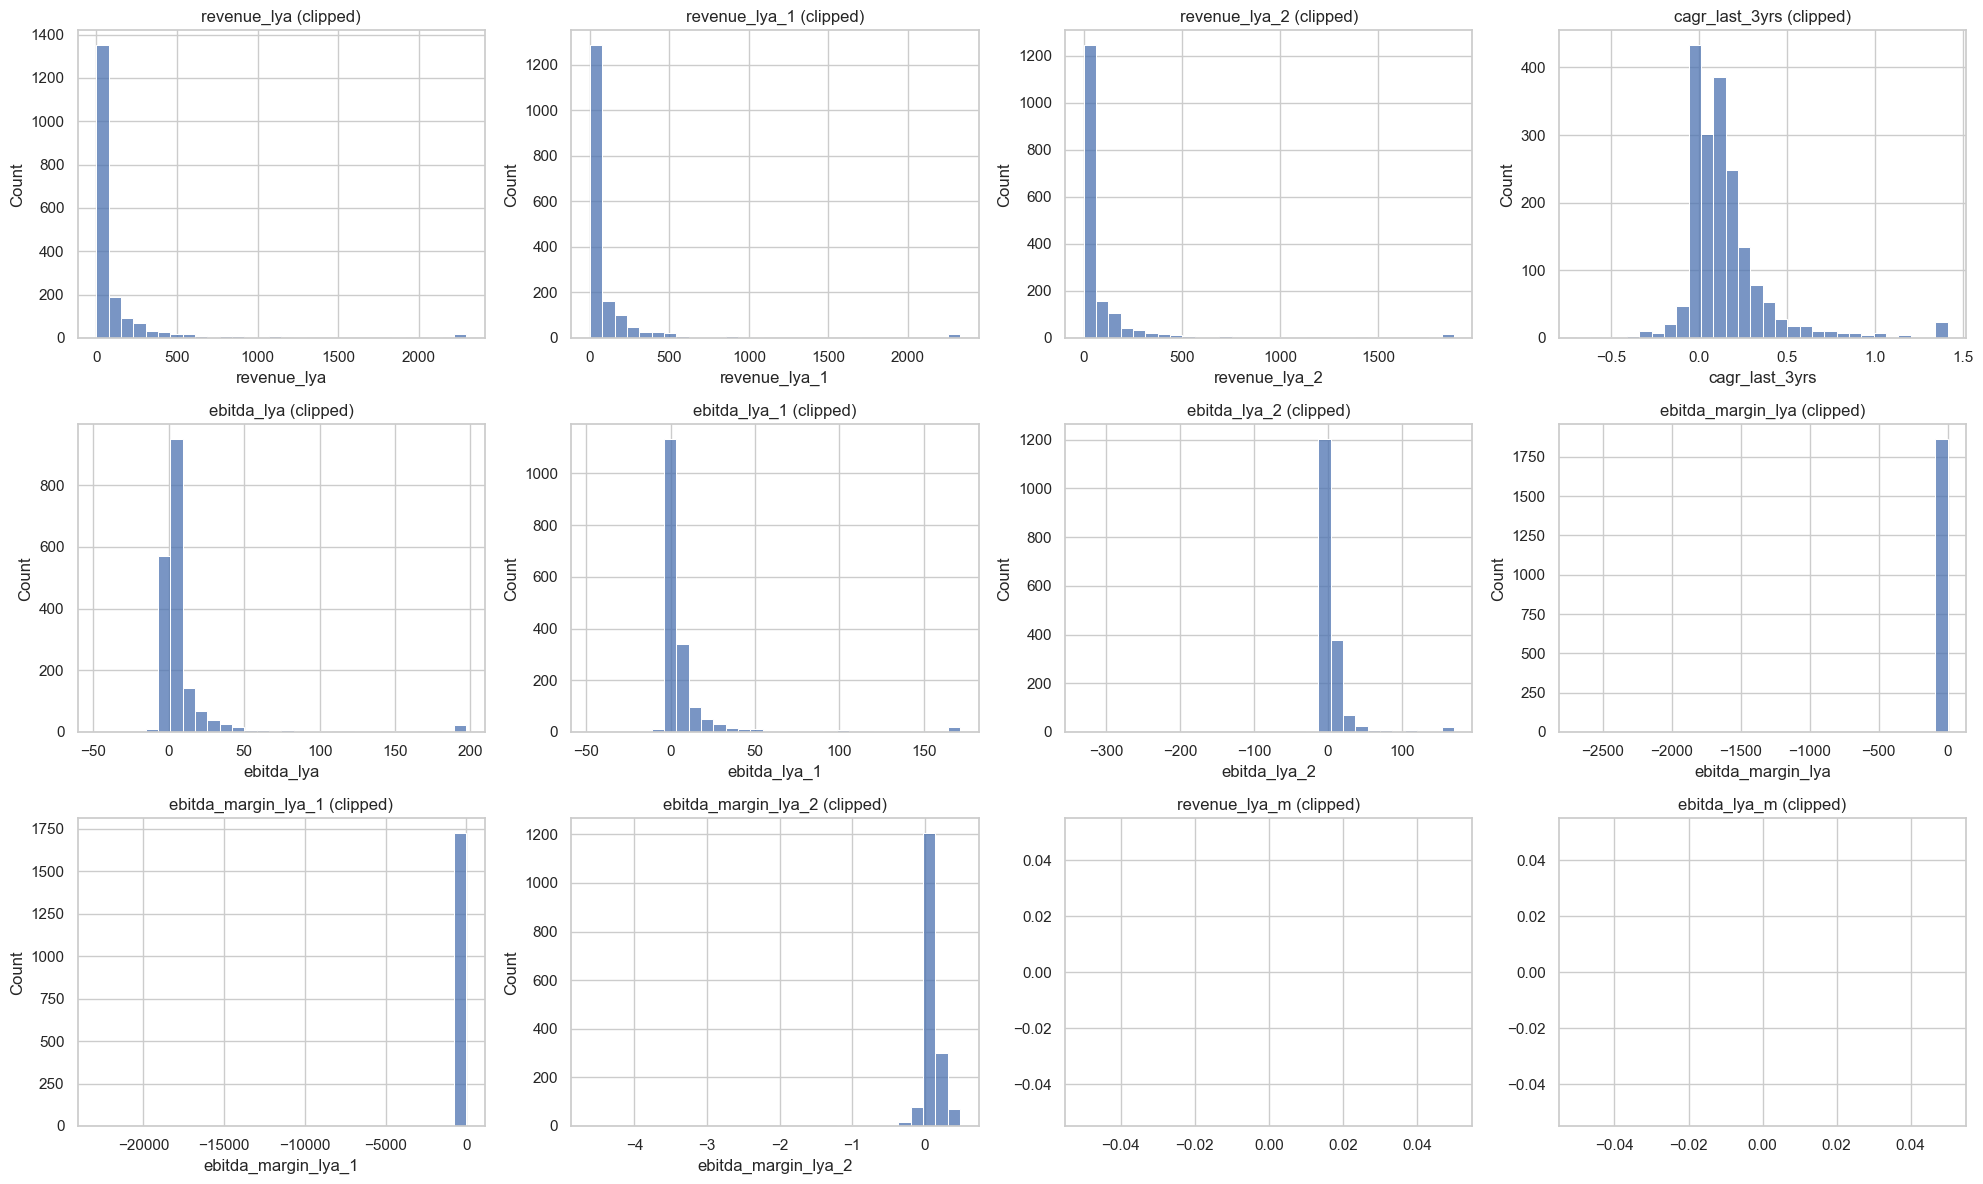

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    values = df[col].dropna()
    clipped = values.clip(upper=values.quantile(0.99))  # Clip top 1%
    sns.histplot(clipped, ax=axes[i], kde=False, bins=30)
    axes[i].set_title(f"{col} (clipped)")

plt.tight_layout()
plt.show()


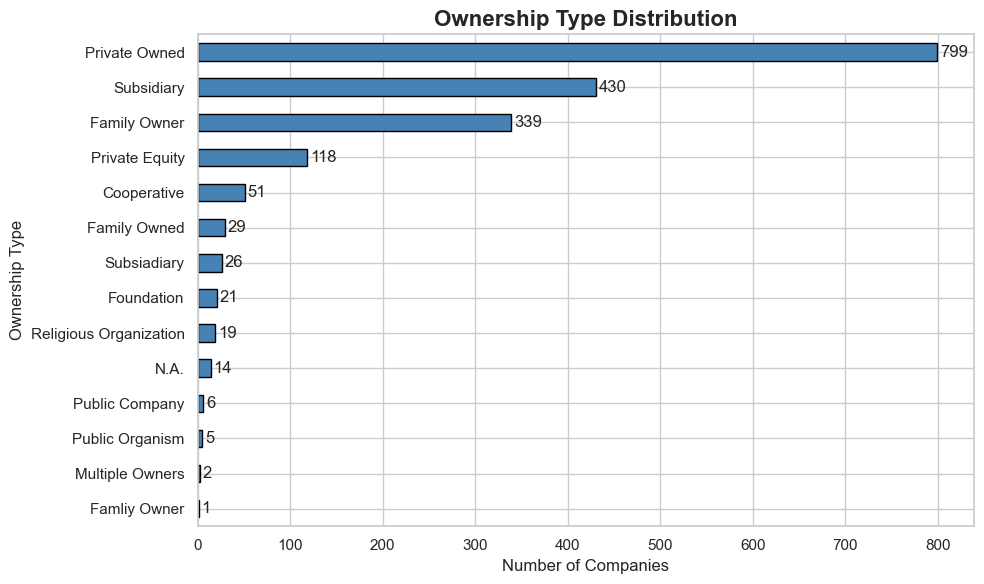

In [30]:
# Clean up ownership_type categories
df["ownership_type_clean"] = (
    df["ownership_type"]
    .str.strip()
    .str.title()
    .replace({
        "Family Owned": "Family Owned",
        "Family owner": "Family Owned",
        "Faily Owned": "Family Owned",
        "Private Owner": "Private Owned",
        "Private owner": "Private Owned",
        "Private Owned": "Private Owned",
        "Pe": "Private Equity",
        "Private Equity": "Private Equity",
        "Public Company": "Public Company",
        "Public company": "Public Company"
    })
)

# Get counts sorted descending
ownership_counts = df["ownership_type_clean"].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ownership_counts.plot(
    kind='barh',
    ax=ax,
    color='steelblue',
    edgecolor='black'
)

# Add count labels to bars
for i, v in enumerate(ownership_counts):
    ax.text(v + 3, i, str(v), va='center')

# Titles and labels
ax.set_title("Ownership Type Distribution", fontsize=16, fontweight='bold')
ax.set_xlabel("Number of Companies", fontsize=12)
ax.set_ylabel("Ownership Type", fontsize=12)
ax.invert_yaxis()  # largest bar on top

plt.tight_layout()
plt.show()


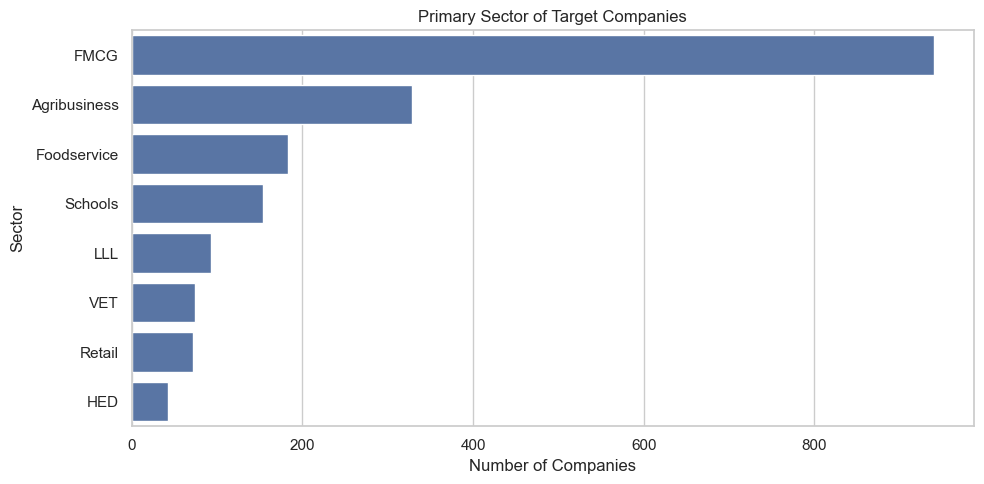

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['char_2'], order=df['char_2'].value_counts().index)
plt.title("Primary Sector of Target Companies")
plt.xlabel("Number of Companies")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

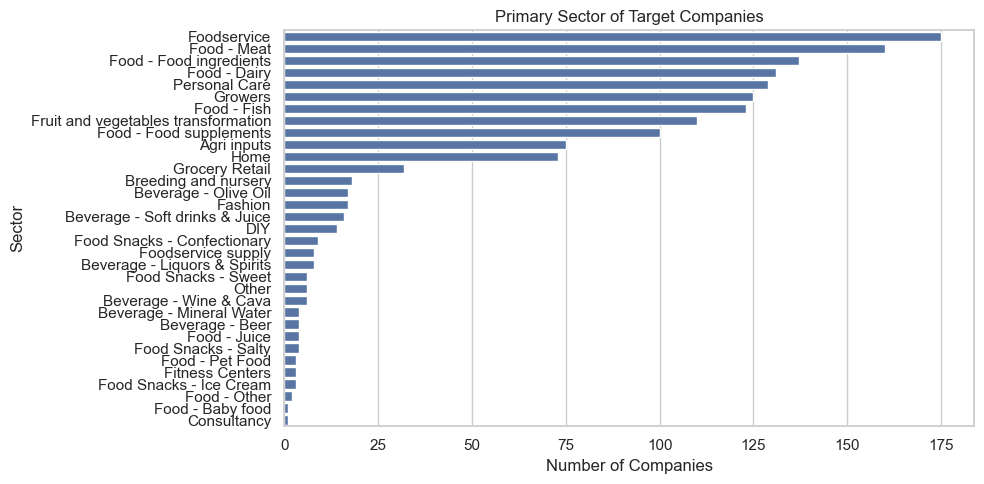

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['char_3'], order=df['char_3'].value_counts().index)
plt.title("Primary Sector of Target Companies")
plt.xlabel("Number of Companies")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

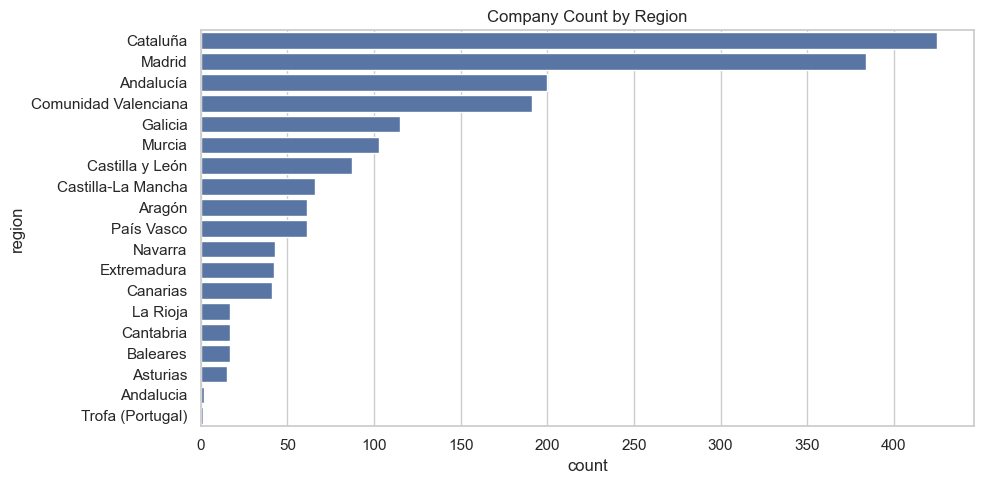

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(y="region", data=df, order=df["region"].value_counts().index)
plt.title("Company Count by Region")
plt.tight_layout()
plt.show()
